# Evidencia 2: Proyecto de Aprendizaje No Supervisado
Daniel Eduardo Arana Bodart, A01741202

Jose Manuel Guerrero Arellano, A01747623

Valeria García Hernández, A01742811

## Limpieza

### Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Crear Dataset

In [ ]:
df = pd.read_csv("students_mental_health_survey.csv")
display(df.shape)
df

(7022, 20)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,24,Medical,Male,3.65,4,3,4,Average,High,Poor,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


Al no tener ninguna columna con información que no consideraramos relevante, o con IDs de los registros, o columnas generadas a partir de otras columnas de la base de datos asumimos que todas las columnas son importantes y procedemos a no eliminar ninguna.

También podemos observar que el dataset parece estar bien, exceptuando que existen valores NaN que deben ser corregidos, para eso vamos a observar la cantidad de NaN que existen en la base de datos para tomar una decisión al respecto.

In [ ]:
df.isna().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

### Remover NaN

Como estamos trabajando con una base de datos con un total de 7022 registros y solamente existen un máximo de 27 registros con algún valor NaN optamos directamente por borrar todos estos registros ya que no representan una cantidad significativo (apenas superior al 0.38% de los datos).

In [ ]:
df = df.dropna()
display(df.shape)
df

(6995, 20)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,20,Law,Female,3.33,1,1,1,Average,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,3,Moderate,29,Off-Campus
7017,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus


In [ ]:
df.isna().any()

Age                            False
Course                         False
Gender                         False
CGPA                           False
Stress_Level                   False
Depression_Score               False
Anxiety_Score                  False
Sleep_Quality                  False
Physical_Activity              False
Diet_Quality                   False
Social_Support                 False
Relationship_Status            False
Substance_Use                  False
Counseling_Service_Use         False
Family_History                 False
Chronic_Illness                False
Financial_Stress               False
Extracurricular_Involvement    False
Semester_Credit_Load           False
Residence_Type                 False
dtype: bool

En base a todo lo trabajado hasta ahora podemos observar que la base de datos quedó justo debajo de los 7000 registros (se eliminaron un total de 27 registros solamente), eliminando satisfactoriamente todos los valores nulos dentro de la base de datos.

### Transformación de valores

La base de datos está lista para ser analizada, solo que por cuestiones de emplear métodos basados en distancia optamos por transformar los datos categóricos ordinales en una representación numérica con el mismo significado. Para eso creamos un dataset numérico.

In [ ]:
df_num = df

#### Columna Course

Donde:

1 = Business

2 = Computer Science

3 = Engineering

4 = Law

5 = Medical

99 = Others



In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_course = {
    'Business': 1,
    'Computer Science': 2,
    'Engineering': 3,
    'Law': 4,
    'Medical': 5,
    'Others': 6
}

#Reemplazamos los strings por números
df_num['Course'] = df_num['Course'].replace(mapeo_respuestas_course)

<ipython-input-58-1b258c2c4bef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Course'] = df_num['Course'].replace(mapeo_respuestas_course)


#### Columna Gender

Donde:

1 = Male

2 = Female

Nota* El análisis no toma en cuenta personas con diferente asignación de género debido a que no existen estos registros en la base de datos original, pero si se llegasen a implementar solo sería cuestión de modificar el código siguiente y agregarlxs siguiendo la misma lógica que se muestra en el código.

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_gender = {
    'Male': 1,
    'Female': 2,
}

#Reemplazamos los strings por números
df_num['Gender'] = df_num['Gender'].replace(mapeo_respuestas_gender)

<ipython-input-59-e5ed6b092378>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Gender'] = df_num['Gender'].replace(mapeo_respuestas_gender)


#### Columna Sleep Quality

Donde:

1 = Poor

2 = Average

3 = Good

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_sleep_quality = {
    'Poor': 1,
    'Average': 2,
    "Good": 3
}

#Reemplazamos los strings por números
df_num['Sleep_Quality'] = df_num['Sleep_Quality'].replace(mapeo_respuestas_sleep_quality)

<ipython-input-60-8ea252bdc85e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Sleep_Quality'] = df_num['Sleep_Quality'].replace(mapeo_respuestas_sleep_quality)


#### Columna Physical Activity

Donde:

1 = Low

2 = Moderate

3 = High

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_physical_activity = {
    'Low': 1,
    'Moderate': 2,
    "High": 3
}

#Reemplazamos los strings por números
df_num['Physical_Activity'] = df_num['Physical_Activity'].replace(mapeo_respuestas_physical_activity)

<ipython-input-61-7f12679c89a6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Physical_Activity'] = df_num['Physical_Activity'].replace(mapeo_respuestas_physical_activity)


#### Columna Diet Quality

Donde:

1 = Poor

2 = Average

3 = Good

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_diet_quality = {
    'Poor': 1,
    'Average': 2,
    "Good": 3
}

#Reemplazamos los strings por números
df_num['Diet_Quality'] = df_num['Diet_Quality'].replace(mapeo_respuestas_diet_quality)

<ipython-input-62-57d6dba22992>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Diet_Quality'] = df_num['Diet_Quality'].replace(mapeo_respuestas_diet_quality)


#### Columna Social Support

Donde:

1 = Low

2 = Moderate

3 = High

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_social_support = {
    'Low': 1,
    'Moderate': 2,
    "High": 3
}

#Reemplazamos los strings por números
df_num['Social_Support'] = df_num['Social_Support'].replace(mapeo_respuestas_social_support)

<ipython-input-63-0a74627fb9e2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Social_Support'] = df_num['Social_Support'].replace(mapeo_respuestas_social_support)


#### Columna Relationship Status

Donde:

1 = Single

2 = In a Relationship

3 = Married

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_relationship_status = {
    'Single': 1,
    'In a Relationship': 2,
    "Married": 3
}

#Reemplazamos los strings por números
df_num['Relationship_Status'] = df_num['Relationship_Status'].replace(mapeo_respuestas_relationship_status)

<ipython-input-64-c67023dfd20d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Relationship_Status'] = df_num['Relationship_Status'].replace(mapeo_respuestas_relationship_status)


#### Columna Substance Use

Donde:

1 = Never

2 = Occasionally

3 = Frecuently

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_substance_use = {
    'Never': 1,
    'Occasionally': 2,
    "Frequently": 3
}

#Reemplazamos los strings por números
df_num['Substance_Use'] = df_num['Substance_Use'].replace(mapeo_respuestas_substance_use)

<ipython-input-65-0aa79ea8ca51>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Substance_Use'] = df_num['Substance_Use'].replace(mapeo_respuestas_substance_use)


#### Columna Counseling Service Use

Donde:

1 = Never

2 = Occasionally

3 = Frecuently

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_counseling_service_use = {
    'Never': 1,
    'Occasionally': 2,
    "Frequently": 3
}

#Reemplazamos los strings por números
df_num['Counseling_Service_Use'] = df_num['Counseling_Service_Use'].replace(mapeo_respuestas_counseling_service_use)

<ipython-input-66-ac24fa92ab9b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Counseling_Service_Use'] = df_num['Counseling_Service_Use'].replace(mapeo_respuestas_counseling_service_use)


#### Columna Family History

Donde:

0 = No

1 = Yes

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_family_history = {
    'No': 0,
    'Yes': 1
}

#Reemplazamos los strings por números
df_num['Family_History'] = df_num['Family_History'].replace(mapeo_respuestas_family_history)

<ipython-input-67-659489b07ba2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Family_History'] = df_num['Family_History'].replace(mapeo_respuestas_family_history)


Columna Chronic Illness

Donde:

0 = No
1 = Si

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_chronic_illness = {
    'No': 0,
    'Yes': 1
}

#Reemplazamos los strings por números
df_num['Chronic_Illness'] = df_num['Chronic_Illness'].replace(mapeo_respuestas_chronic_illness)

<ipython-input-68-e4551d5fb90d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Chronic_Illness'] = df_num['Chronic_Illness'].replace(mapeo_respuestas_chronic_illness)


#### Columna Extracurricular Involvement

Donde:

1 = Low

2 = Moderate

3 = High

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_extracurricular_involvement = {
    'Low': 1,
    'Moderate': 2,
    "High": 3
}

#Reemplazamos los strings por números
df_num['Extracurricular_Involvement'] = df_num['Extracurricular_Involvement'].replace(mapeo_respuestas_extracurricular_involvement)

<ipython-input-69-20fed979bde5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Extracurricular_Involvement'] = df_num['Extracurricular_Involvement'].replace(mapeo_respuestas_extracurricular_involvement)


#### Columna Residence Type

Donde:

1 = Off-Campus

2 = On-Campus

3 = With Family

In [ ]:
#Mapeamos todas las posibles respuestas y les asignamos un número
mapeo_respuestas_residence_type = {
    'Off-Campus': 1,
    'On-Campus': 2,
    "With Family": 3
}

#Reemplazamos los strings por números
df_num['Residence_Type'] = df_num['Residence_Type'].replace(mapeo_respuestas_residence_type)

<ipython-input-70-0272a8f8c35a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Residence_Type'] = df_num['Residence_Type'].replace(mapeo_respuestas_residence_type)


In [ ]:
#Hubo un problema con df, ya que también fueron reemplazados sus valores, por lo que se vuelve a crear
df = pd.read_csv("students_mental_health_survey.csv")
df = df.dropna()

## Análisis Explorativo

Para comenzar con el análisis explorativo comenzaremos viendo cómo se muestra el dataset en sus primeros 10 registros luego de todas las transformaciones.

In [ ]:
df_num.head(10)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,6,1,3.56,3,3,2,3,2,3,2,3,1,1,0,0,2,2,17,2
1,24,3,2,2.44,0,3,0,2,1,2,1,1,2,2,0,0,3,1,27,2
2,19,1,2,3.74,4,0,3,3,1,2,2,2,1,2,0,0,4,3,15,2
4,18,1,1,3.40,3,3,4,3,1,2,3,3,1,1,0,1,0,3,23,2
5,21,5,2,3.35,2,4,3,3,2,3,3,1,1,1,0,0,5,2,19,1
6,18,4,1,3.65,2,2,5,3,2,2,2,1,1,1,0,0,4,2,20,1
7,21,1,2,3.40,0,3,3,2,1,2,1,3,1,1,1,0,3,2,23,2
8,24,5,1,3.80,3,2,1,1,1,2,2,1,3,1,1,0,2,1,28,2
12,22,2,1,3.19,1,1,3,2,2,2,2,2,1,2,0,0,1,3,17,2
13,27,5,1,3.26,3,2,2,2,2,2,3,2,1,2,0,0,1,2,17,3


Donde:

```
Age: Edad del individuo
Course: Carrera de estudio del individuo (1 = Business, 2 = Computer Science, 3 = Engineering, 4 = Law, 5 = Medical, 99 = Others)
Gender: Género autoasginado del individuo (1 = Male, 2 = Female)
CGPA: Promedio acumulado del individuo
Stress Level: Nivel de estrés del individuo
Depresion Score: Nivel de depresión experimentado por el individuo
Anxiety Score: Nivel de ansiedad experimentado por el individuo
Sleep Quality: cálidad del sueño de los individuos (1 = Poor, 2 = Average, 3 = Good)
Physical Activity: Nivel de actividad física (1 = Low, 2 = Moderate, 3 = High)
Diet Quality: Cálidad de la dieta del individuo (1 = Poor, 2 = Average, 3 = Good)
Social Support: Nivel de apoyo social recibido por el individuo (1 = Low, 2 = Moderate, 3 = High)
Relationship Status: Estado Civil del individuo (1 = Single, 2 = In a Relationship, 3 = Married)
Substance Use: Uso de sustancias como alcohol, cigarros o drogas (1 = Never, 2 = Occasionally, 3 = Frecuently)
Counseling Service Use: Uso de los servicios de asesoramiento (1 = Never, 2 = Occasionally, 3 = Frecuently)
Family History: Si el individuo tiene familiares con historial en problemas de salud mental o no (0 = No, 1 = Yes)
Chronic Illness: Si el individuo tiene alguna enfermedad crónica o no (0 = No, 1 = Si)
Financial Stress: Nivel de estrés financiero del individuo
Extracurricular Involvement: Nivel de involucramiento en actividades extracurriculares (1 = Low, 2 = Moderate, 3 = High)
Semester Credit Load: Número de créditos que el individuo toma en el semestre
Residence Type: Tipo de residencia del individuo (1 = Off-Campus, 2 = On-Campus, 3 = With Family)
```



In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   int64  
 2   Gender                       6995 non-null   int64  
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   int64  
 8   Physical_Activity            6995 non-null   int64  
 9   Diet_Quality                 6995 non-null   int64  
 10  Social_Support               6995 non-null   int64  
 11  Relationship_Status          6995 non-null   int64  
 12  Substance_Use                6995 non-null   int64  
 13  Counseling_Service_Use 

Con esta información podemos observar que existen un total de 6995 registros en la base de datos, ninguno de ellos contiene valores nulos; existen también 20 columnas en total. También se puede notar que todos los valores de la base de datos numérica son enteros con excepción del promedio acumulado que es de tipo flotante.

Para el análisis explorativo usaremos la base de datos df para los nombres de los ejes de las gráficas. Es necesario dividir la base de datos en variables meramente numéricas y categóricas.

In [ ]:
df_categ = df.drop(columns = ["Age","CGPA","Semester_Credit_Load"])

### Variables numéricas

Text(0.5, 1.0, 'Histograma de Edad')

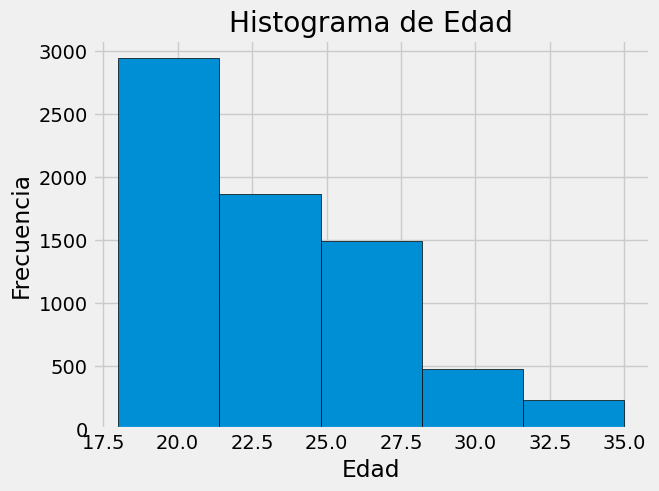

In [ ]:
plt.hist(df_num["Age"], bins=5,edgecolor = "black")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')

Con esta gráfica se puede observar que la gran mayoría de los individuos registrados en este dataset tienen una edad de 18 hasta 21 años aproximadamente, y a medida que el rango de edad va aumentando la frecuencia con la que aparecen estos individuos disminute considerablemente. Pasando de casi 3000 registros de 18 a 21 años a aproximadamente 200 registros desde 32 hasta 35 años.

Text(0.5, 1.0, 'Promedio acumulado')

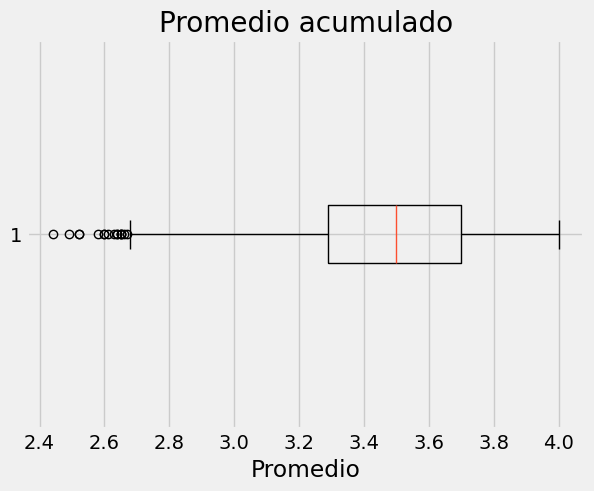

In [ ]:
plt.boxplot(df_num["CGPA"], vert=False)

plt.xlabel('Promedio')
plt.title('Promedio acumulado')

De este diagrama de cajas y bigotes se puede observar algo muy interesante, el máximo se encuentra exactamente en el 4 y no se considera como valor atípico, mientras que el rango intercuartílico es bastante grande, desde 2.7 hasta 4, con una mediana un poco superior a los 3.5 puntos. También se tienen bastantes datos atípicos para esta variable, es decir, individuos cuyo rendimiento en la escuela no es el mejor.

Text(0, 0.5, 'Frecuencia')

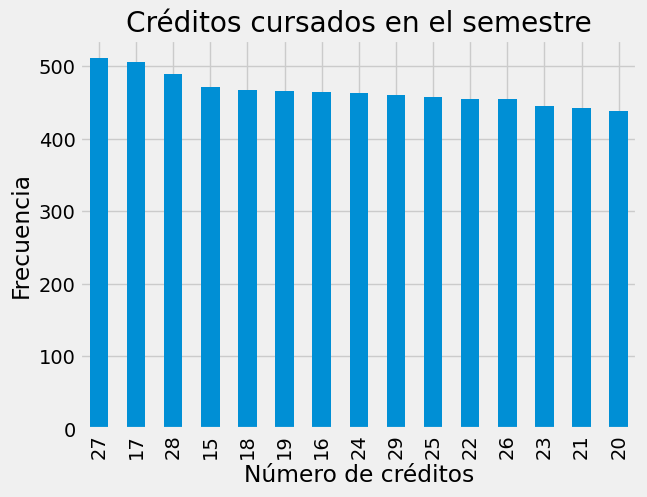

In [ ]:
frecuencia_creditos = df["Semester_Credit_Load"].value_counts()
frecuencia_creditos.plot(kind="bar")
plt.title('Créditos cursados en el semestre')
plt.xlabel("Número de créditos")
plt.ylabel("Frecuencia")

De este gráfico se pueden observar cualidades muy interesantes, como por ejemplo, nos encontramos ante una serie de datos muy balanceados, ya que la diferencia entre la frecuencia mayor y menor sería de apenas unas 50 personas, siendo 27 el número de créditos con mayor frecuencia y 20 el número de créditos con menor frecuencia, esto es bastante interesante, ya que los extremos (15 y 29) no son los valores con menor frecuencia como uno esperaría.

### Variables categróricas

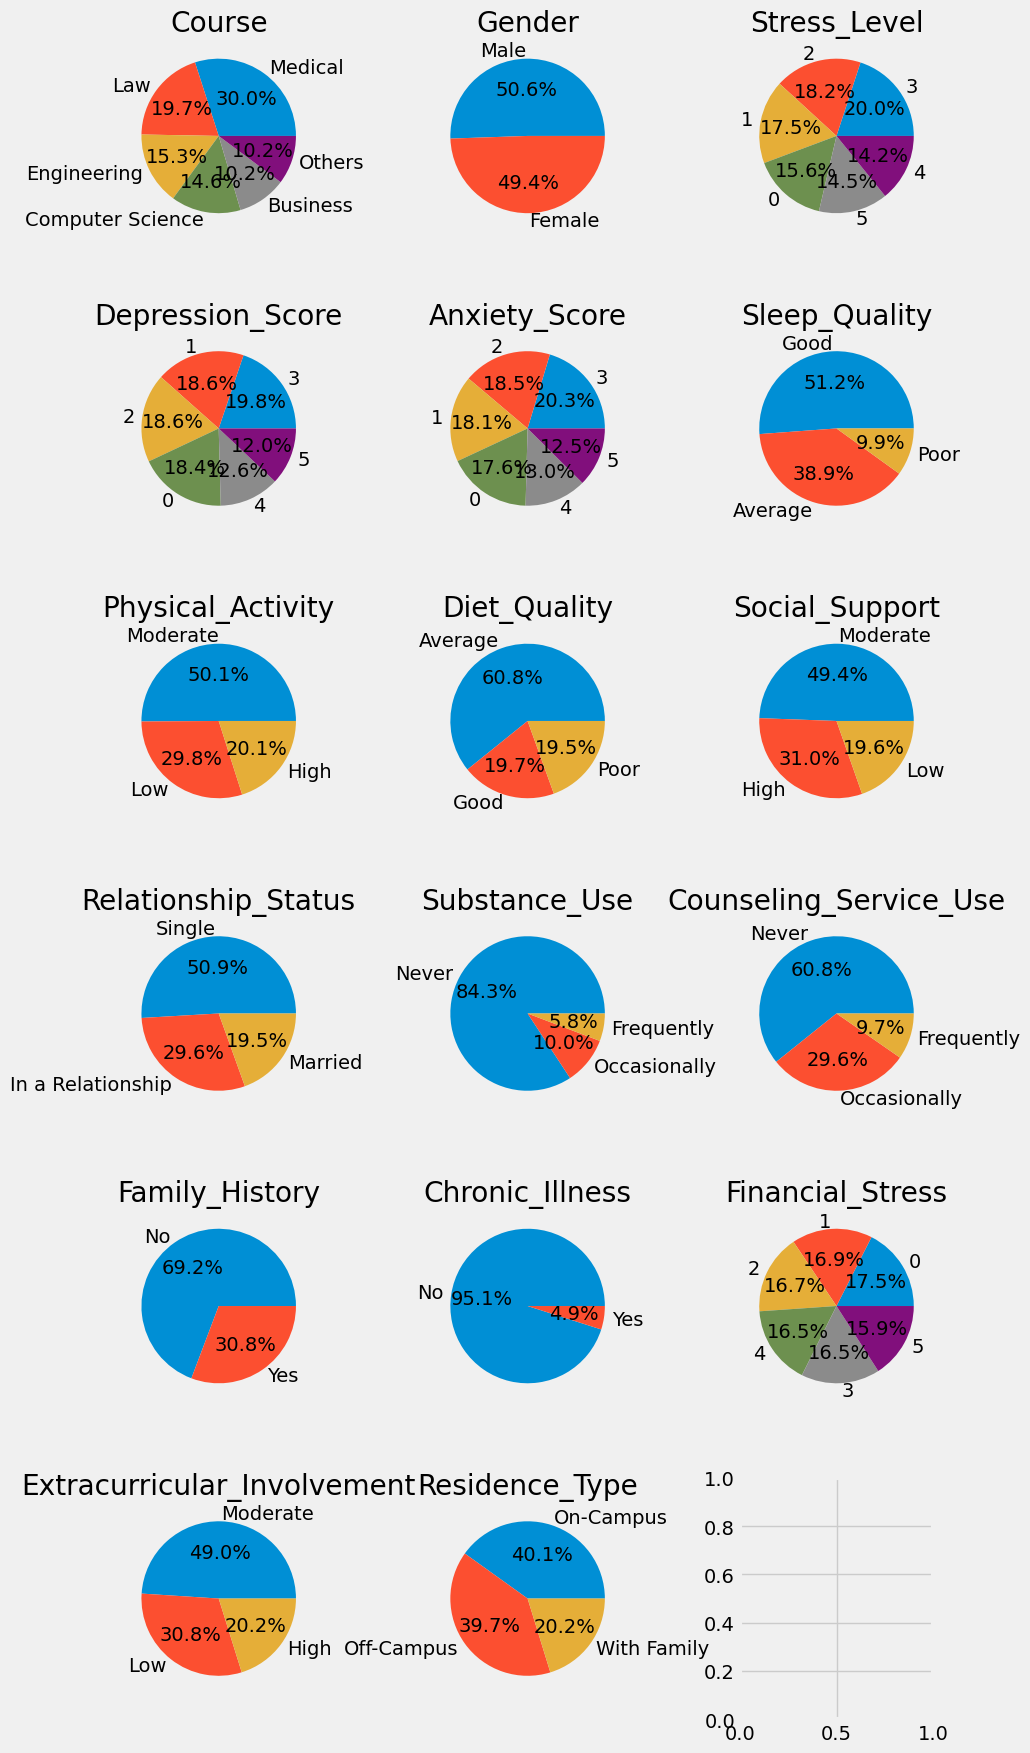

In [ ]:
# Crear un subplot de tamaño adecuado

num_plots = len(df_categ.columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

# Iterar sobre cada columna y dibujar los diagramas de pastel
for i, (col, ax) in enumerate(zip(df_categ.columns, axes.flatten())):
    counts = df[col].value_counts(normalize=True)
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(f'{col}')

plt.tight_layout()
plt.show()

Con todas estas gráficas podemos observar la distribución de todas las variables que se convirtieron en valores numéricos. Estas gráficas se hicieron con el objetivo de observar la distribución de los datos para cada variable y encontrar información interesante. Por ejemplo, se tienen datos casi totalmente balanceados entre hombres y mujeres; la carrera que más se estudia es medicina; el nivel de estrés, depresión y ansiedad más común es el 3; la mayoría considera que su cálidad del sueño es buena; al igual que la mayoría considera que realiza actividad física moderada, un 84% de los individuos nunca han consumido sustancias dañinas; aparentemente el nivel de estrés financiero no es muy predecible, ya que tiene casi la misma proporción para todos los valores; más de 3 de cada 4 individuos residen sin sus familiares, es sumamente inusual que un individuo tenga alguna enfermedad crónica. Todos estos descubrimientos, junto con muchos otros se pueden realizar solamente con estas gráficas.

## Modelos de Aprendizaje No Supervisado

###Normalizacion de los datos
Para poder trabajar con el modelo, y que todas las variables tengan el mismo peso, es decir, que todas influyan de la misma manera, se recomienda realizar una normalización, debido a que la computadora no es capaz de interpretar las columanas de la manera en la que nosotros lo hacemos. Por ejemplo, para nosotros es muy fácil saber que valores binarios responden a preguntas si/no, y que valores como promedio de calificación son variables contínuas, sin embargo, para la computadora son 2 columnas, una que tiene valores de 0 a 1, y otra que tiene valores de 0 a 10.

In [ ]:
df_num = ((df_num- df_num.min()) / (df_num.max() - df_num.min()) * 9 + 1)

### Visto en clase Clustering K-Means

In [ ]:
!pip install kneed
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.cluster import KMeans

Definimos esta funcion para poder realizar el mapeo de las variables, como se esta hablando de 61 componentes, se implementó una reducción a través del análisis de componentes principales, en donde se hace una reducción a 2 variables. Posteriormente, se realiza el gráfico.

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components = 2)


  df_pca = pd.concat([centroids.T, data], ignore_index=True)

  df_pca = df_pca.reset_index(drop = True)

  df_pca

  df_2d = pca.fit_transform(df_pca)

  df_2d


  df_data_2d = df_2d[(df_2d.shape[0] - labels.shape[0]):]

#centroids_2d = pca.fit_transform(centroids.T)
#clear_output(wait = True)
  plt.title(f'Iteracion {iteration}')


  plt.scatter(x = df_data_2d[:,0], y = df_data_2d[:,1], c = labels)
  plt.scatter(x = df_2d[:4,0], y = df_2d[:4,1])

  plt.show()

En esta parte se realaiza el entrenamiento del modelo Kmeans, en donde se evalúa el desempeño de 1 a 11 clusters, guardando los resultados en la lista de suma de distancias euclideanas.

In [ ]:

kmeans_kwargs = {'init':'random',
                 'n_init':10,
                 'max_iter':300,
                 'random_state':42}


sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_num)
  sse.append(kmeans.inertia_)

Se guarda la informacion de los clusters en un dataframe de pandas para poder mapearlos dentro del grafico.

In [ ]:
centroids_skl = kmeans.cluster_centers_
centroids_2 = pd.DataFrame(centroids_skl, columns = df_num.columns).T

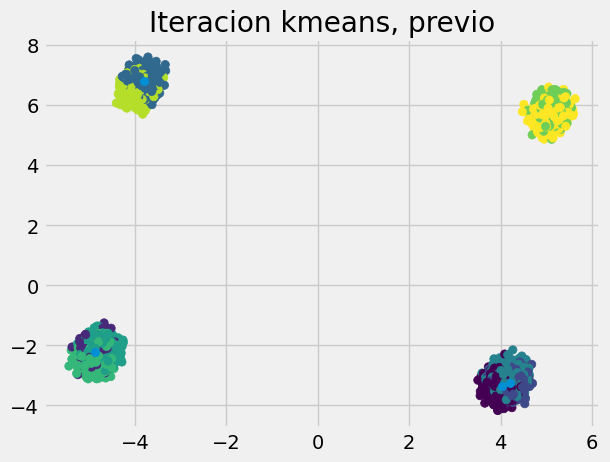

In [ ]:
plot_clusters(df_num,kmeans.labels_, centroids_2, 'kmeans, previo' )

Se realiza el gráfico del desempeño del modelo, con respecto al número de clusters generados en la iteración. En este caso, el número idóneo de clusters a través del método del codo fue de 4.

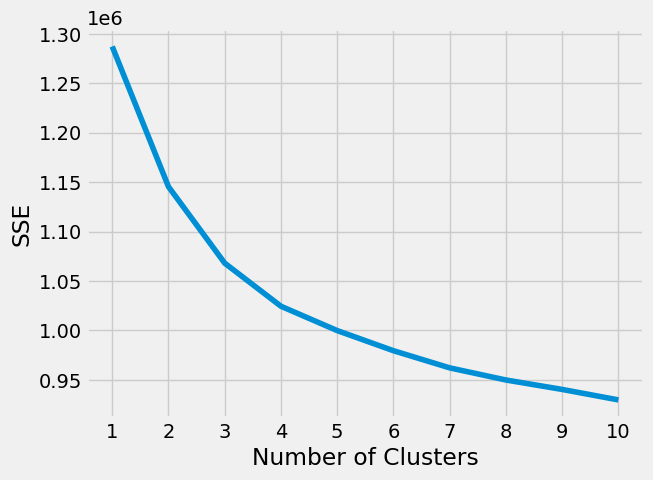

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

Posteriormente, se realiza la evaluación a través de los coeficientes de siluetas para poder evaluar el modelo, nuevamente a partir de la cantidad de clusters generados. Nuevamente, se realizan itearaciones de 2 a 11 clusters, de igual manera, se añaden los resultados a un dataframe, para así posteriormente pdoer graficar los resultados del desempeño del modelo.

In [ ]:
silhouette_coefficients = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_num)
  score = silhouette_score(df_num, kmeans.labels_)
  silhouette_coefficients.append(score)

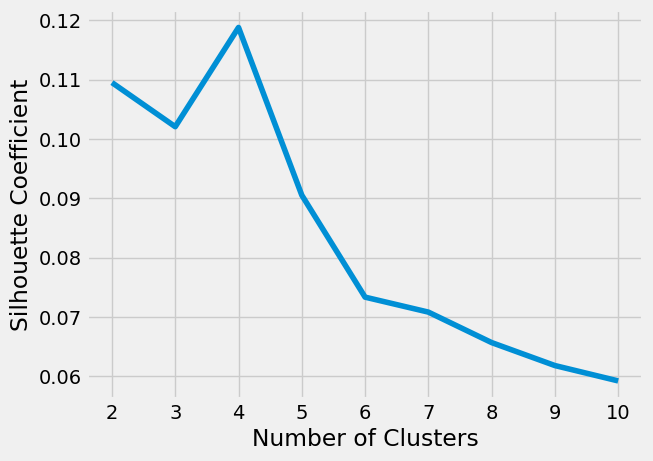

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Se realiza el modelo nuevamente, con el número de clusters ideal.Como se puede ver, a diferencia del modelo pasado, este tiene un pico en 4 clusters. Es interesante ver cómo a diferencia del gráfico de distancias, este tiene una caída importante en el coeficiente pasando el máximo de clusters.

In [ ]:

kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(df_num)


KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [ ]:
centroids_skl = kmeans.cluster_centers_
centroids_2 = pd.DataFrame(centroids_skl, columns = df_num.columns).T

Se puede ver cómo es que a través de insertar el número ideal, se puede obtener de manera adecuada una separación clara entre los clusters predichos.

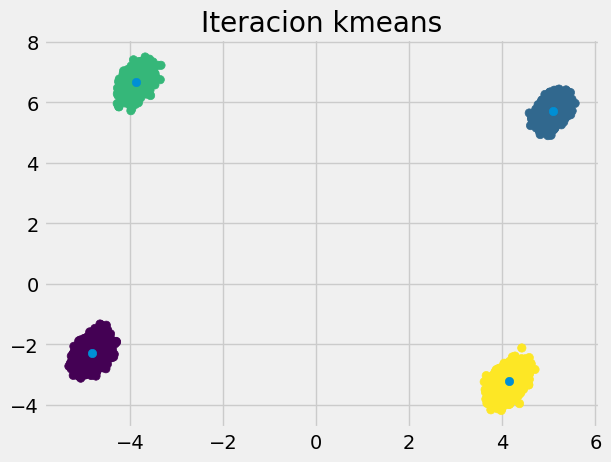

In [ ]:
plot_clusters(df_num,kmeans.labels_, centroids_2, 'kmeans' )

Coeficiente de siluetas para nuestro modelo

In [ ]:
# Calcular el silhouette score para este modelo
modes_silhouette_score = silhouette_score(df_num, kmeans.labels_)
# Mostrar los resultados
print('El silhouette score para el modelo de Kmeans  es', modes_silhouette_score)

El silhouette score para el modelo de Kmeans  es 0.11876927789176693


### Ajeno a la clase: K-Mode

Realizado por medio del tutorial: https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

El algoritmo KModes es una extensión del algoritmo KMeans que se utiliza para realizar clustering en conjuntos de datos con atributos categóricos en lugar de numéricos. Funciona de manera similar al algoritmo KMeans, pero en lugar de calcular la distancia euclidiana entre puntos en un espacio de características numéricas, KModes utiliza una medida de distancia apropiada para datos categóricos.

In [ ]:
#libreria necesarias
!pip install kmodes
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#copia de los datos para evitar modificar el data frame original
data=df_num.copy()




In [ ]:

#Lista para almacenar los costos
cost = []

#Numero de cluster que se probaran en el algoritmo
K = range(1,11)

# Bucle de iteración sobre cada valor en la lista K
for num_clusters in list(K):
    # Inicialización de KModes con el número de clusters actual
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init =5 , verbose=0)
    # Ajuste del modelo y predicción de los clusters para los datos
    kmode.fit_predict(data)
    # Añadir el costo del modelo actual a la lista cost
    cost.append(kmode.cost_)


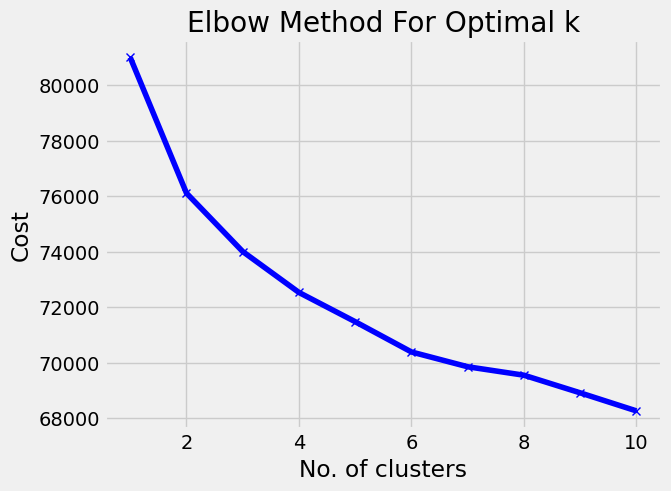

In [ ]:
# Graficar el número de clusters versus el costo
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

A partir de esta gráifca, se puede calcular el punto de inflexión del costo del modelo a través del siguiente código.

In [ ]:
kl_modes = KneeLocator(range(1, 11), cost, curve="convex", direction="decreasing")
kl_modes.elbow

4

De igual manera, se puede corroborar a través de este comando, que el número ideal del modelo kmodes es de 4 clusters

In [ ]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=4, **kmeans_kwargs)
kmode.fit(data)


KModes(init='random', max_iter=300, n_clusters=4, random_state=42)

In [ ]:
# Ajustando el modelo y prediciendo los clusters para los datos
clusters = kmode.fit_predict(data)
# Obtener centroides del modelo KModes
centroids = kmode.cluster_centroids_
centroids_1 = pd.DataFrame(centroids, columns = data.columns).T

In [ ]:
centroids_mode_skl = kmeans.cluster_centers_
centroids_mode_2 = pd.DataFrame(centroids_mode_skl, columns = df_num.columns).T

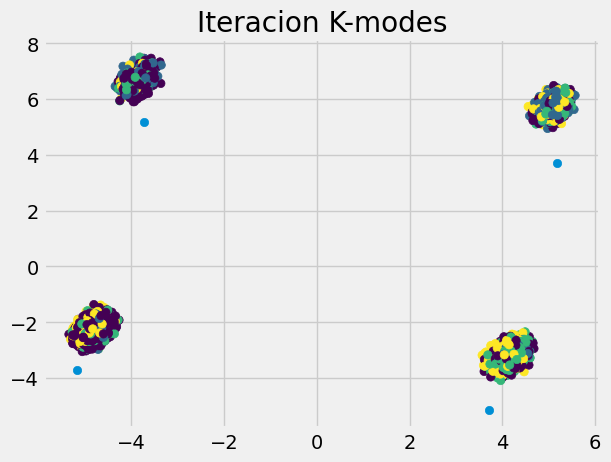

In [ ]:
plot_clusters(data,kmode.labels_, centroids_mode_2, 'K-modes' )

In [ ]:
# Calcular el silhouette score para este modelo
modes_silhouette_score = silhouette_score(data, clusters)
# Mostrar los resultados
print('El silhouette score para el modelo de Kmodes  es', modes_silhouette_score)

El silhouette score para el modelo de Kmodes  es 0.001720514447387208


Observamos que para este metodo la agrupación no es tan certera y tenemos un coeficiente de siluetas bajo. Esto podría deberse a que nuestro data set presenta una combinación de variables numericas y categorica.Dado los problemas identificados con K-Modes, hemos decidido explorar alternativas que puedan superar estas limitaciones y proporcionar una comprensión más completa de los patrones de salud mental entre los alumnos. A

Links:
https://www.geeksforgeeks.org/k-mode-clustering-in-python/
